### RNN 활용하기
- 네이버 영화 리뷰데이터 감성분석
- 긍정/부정 (이진분류) 데이터셋

In [ ]:
# 구글 마운트
# 파일 위치 변경
%cd /content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning

/content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('./data/ratings_train.txt', delimiter='\t')
test = pd.read_csv('./data/ratings_test.txt', delimiter='\t')
train.shape, test.shape

((150000, 3), (50000, 3))

In [ ]:
train.head()
# id : 사용자 정보
# document : 리뷰 (텍스트)
# label : 정답데이터 (0 부정, 1 긍정)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
# 데이터 정보 확인
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


- 결측치 확인 -> 제거!

In [ ]:
# 결측치 제거
train.dropna(inplace=True)
test.dropna(inplace=True)

train.shape, test.shape

((149995, 3), (49997, 3))

In [ ]:
# 문제(document)와 정답(label)으로 분리
X_train = train['document']
X_test = test['document']
y_train = train['label']
y_test = test['label']

X_train.head()
# 문장형태의 데이터를 분석하기 위해 토큰화, 백터화 진행~

,document
0,아 더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...


In [ ]:
# 문장을 학습용 수치데이터(토큰화, 벡터화)로 변경해주는 클래스
from tensorflow.keras.layers import TextVectorization

In [ ]:
# 벡터화 도구 객체 생성
vectorizer = TextVectorization(max_tokens=5000,  # 사용할 최대 단어 토큰 수 제한: 5000개 (빈도수 기준)
                               output_mode='int', # 빈도기반으로 랭킹화 하기위해 숫자로 지정
                               standardize='lower_and_strip_punctuation', output_sequence_length=10)
# output_sequence_length: 모든 문장의 길이를 통일 -> 길면 자르고, 짧으면 0으로 채워 맞춰줌
# 왜? 샘플들이 모두 같은 순환횟수를 가져야 하기 때문

In [ ]:
# 훈련데이터 기반으로 전처리 토큰화 단어사전구축 실시
vectorizer.adapt(X_train)

In [ ]:
# 단어사전의 수 확인
vectorizer.vocabulary_size()   # max_tokens에 의해 제어됨

5000

In [ ]:
# 단어 토큰 확인
vectorizer.get_vocabulary()

['',
 '[UNK]',
 '영화',
 '너무',
 '정말',
 '진짜',
 '이',
 '왜',
 '그냥',
 '이런',
 '더',
 '수',
 '영화를',
 '잘',
 '다',
 '보고',
 '좀',
 '영화는',
 '영화가',
 '그',
 '본',
 '최고의',
 '봤는데',
 'ㅋㅋ',
 '없는',
 '내가',
 '이건',
 '없다',
 '이렇게',
 '드라마',
 '완전',
 '평점',
 '이거',
 '있는',
 '좋은',
 '이게',
 '참',
 '아',
 '평점이',
 '보는',
 '내',
 '연기',
 '다시',
 '그리고',
 '역시',
 '쓰레기',
 '많이',
 '것',
 '최고',
 '난',
 '스토리',
 '재밌게',
 '한',
 '없고',
 '하는',
 '또',
 '꼭',
 '보면',
 '가장',
 '아깝다',
 'ㅋㅋㅋ',
 'ㅠㅠ',
 '마지막',
 '영화다',
 '뭐',
 '무슨',
 'ㅡㅡ',
 'ㅋ',
 '10점',
 '같은',
 '하지만',
 '볼',
 '별로',
 '끝까지',
 '작품',
 '솔직히',
 '대한',
 '안',
 '만든',
 '넘',
 '봐도',
 '전혀',
 '말이',
 '아주',
 '영화의',
 '내내',
 '지금',
 '같다',
 'ㅎㅎ',
 '최악의',
 '뭔가',
 '좋다',
 '할',
 '하고',
 '다른',
 '재미',
 '있다',
 '그래도',
 '않고',
 '재미있게',
 '어떻게',
 '많은',
 '하나',
 '연기가',
 '별',
 '중',
 '듯',
 '감독',
 '이걸',
 '재밌다',
 '굿',
 '와',
 '아니라',
 '연기도',
 '이야기',
 '모두',
 '1점',
 '아니다',
 '봤다',
 '근데',
 '아름다운',
 '보다가',
 '스토리가',
 '나는',
 '명작',
 '때문에',
 '계속',
 '감동',
 '제대로',
 '나오는',
 '시간',
 '느낌',
 '제일',
 '영화에',
 '내용도',
 '모든',
 '내용이',
 '않은',
 '차라리',
 '아직도',
 '

In [ ]:
X_train[0]

'아 더빙.. 진짜 짜증나네요 목소리'

In [ ]:
# 벡터화 진행
vectorizer(X_train)

<tf.Tensor: shape=(149995, 10), dtype=int64, numpy=
array([[  37,  914,    5, ...,    0,    0,    0],
       [   1,    1,    1, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0],
       ...,
       [  35,    1,    1, ...,    0,    0,    0],
       [3429,   84,    1, ...,    0,    0,    0],
       [ 218,    2, 3740, ...,    0,    0,    0]])>

In [ ]:
X_train_vec = vectorizer(X_train)
X_test_vec = vectorizer(X_test)

X_train_vec.shape, X_test_vec.shape

(TensorShape([149995, 10]), TensorShape([49997, 10]))

- 149995 : 리뷰수
- 10 : 한 문장의 단어 토큰 수 -> 순환횟수가 된다

### simpleRNN 모델링
- 입력층 -> input_shape = (순환횟수, 특성 수) 순환횟수: 한 문장에 있는 토큰 수-> 10개,특성수 ->단어 1개
- 중간층 -> simpleRNN -> 64 units
- 이진분류를 위한 출력층 개수

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, SimpleRNN

In [ ]:
rnn_model = Sequential()
rnn_model.add(InputLayer(input_shape=(10,1)))
rnn_model.add(SimpleRNN(units=64))

rnn_model.add(Dense(units=1, activation='sigmoid'))

# 최적화 함수 : adam
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 학습 : 검증데이터 =0.2, 반복횟수 20, 배치사이즈 128
rnn_model.fit(X_train_vec, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5062 - loss: 0.7035 - val_accuracy: 0.5091 - val_loss: 0.6937
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5138 - loss: 0.6938 - val_accuracy: 0.5082 - val_loss: 0.6942
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5141 - loss: 0.6931 - val_accuracy: 0.5081 - val_loss: 0.6934
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5169 - loss: 0.6926 - val_accuracy: 0.5091 - val_loss: 0.6943
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5134 - loss: 0.6931 - val_accuracy: 0.5128 - val_loss: 0.6932
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5142 - loss: 0.6926 - val_accuracy: 0.5112 - val_loss: 0.6926
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5102 - loss: 0.6933 - val_accuracy: 0.5123 - val_loss: 0.6931
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5110 - loss: 0.6929 - val_accuracy: 0.5110 - val

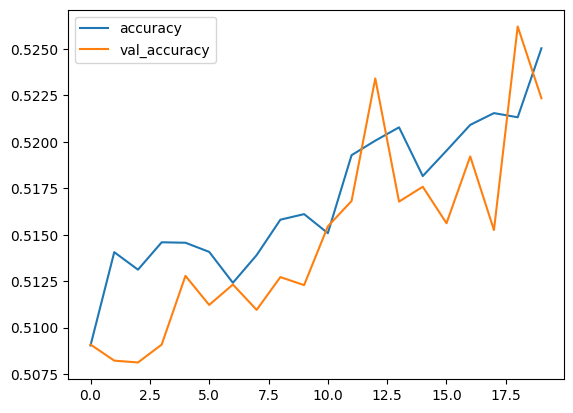

In [ ]:
# 학습결과 시각화(acc, val_acc)
plt.plot(rnn_model.history.history['accuracy'], label='accuracy')
plt.plot(rnn_model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

###### 그래프 해석
- 정확도가 향상되며 학습을 진행하고 있으나, 정확도가 높은 편이 아님 -> 가장 기본적인 RNN 모델을 사용했음
- 모델의 성능 (정확도)을 높이는 방법
1. 더 좋은 성능의 모델을 사용하여 학습
2. 데이터의 질, 양을 향상시키는 방법

### 기본 RNN의 경우 긴 시퀀스를 가지는 데이터를 효과적으로 학습하기 어려움
- 순환횟수가 길어질수록 초반에 입력된 단어의 기억데이터 소실되는 기울기 소실현상이 일어남
- 문장 구성시 초반 단어가 후반 예측에 영향을 주는 문장일 경우, SimpleRNN은 학습의 결과가 좋지 않을 수 있음
  - 반짝이는 보석같이 아름다운 ___이(가) 있었다. -> 너, 은하수, 별, 돌멩이, 조개, 달
  - 어제 저녁 하늘에는 반짝이논 보석같이 아름다운 __이(가) 있었다. -> 별
  > 문장이 길어질때 기울기 소실문제로 초반의 내용기억을 잃는다.

### 보완
- 단점을 보완하기 위해 나온 알고리즘: LSTM (Long Short Term Memory)
  - 장기기억, 단기기억 관리 계산이 추가된 모델
  - 단점: 연산이 복잡해짐

- LSTM의 연산복잡성을 줄인 GRU 모델도 존재

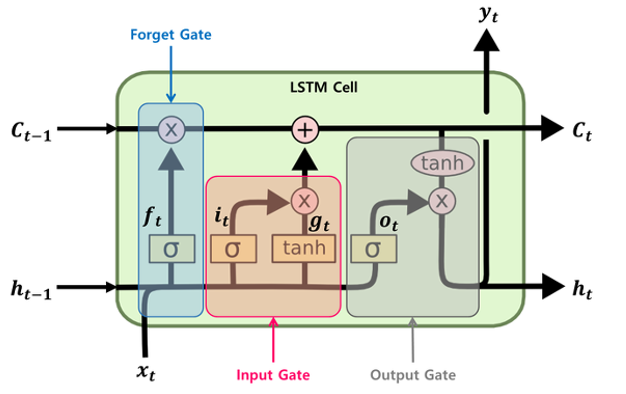

### LSTM (Long Short Term Memory)
- RNN 모델의 기억소실문제를 보완한 모델

In [ ]:
from tensorflow.keras.layers import LSTM, GRU

In [ ]:
# 모델 설계
lstm_model = Sequential()
lstm_model.add(InputLayer(input_shape=(10,1)))
lstm_model.add(LSTM(units=64))
lstm_model.add(Dense(units=1, activation='sigmoid'))
# 모델학습 및 평가방법 설정
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 학습
lstm_model.fit(X_train_vec,y_train, validation_split=0.2, epochs=20, batch_size=128)

# 6분 걸림

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.5174 - loss: 0.6935 - val_accuracy: 0.5347 - val_loss: 0.6901
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.5269 - loss: 0.6913 - val_accuracy: 0.5276 - val_loss: 0.6905
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.5316 - loss: 0.6904 - val_accuracy: 0.5343 - val_loss: 0.6903
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.5290 - loss: 0.6907 - val_accuracy: 0.5351 - val_loss: 0.6894
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.5309 - loss: 0.6901 - val_accuracy: 0.5358 - val_loss: 0.6892
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.5362 - loss: 0.6894 - val_accuracy: 0.5389 - val_loss: 0.6890
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.5367 - loss: 0.6892 - val_accuracy: 0.5387 - val_loss: 0.6888
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.5344 - loss: 0.6893 - 

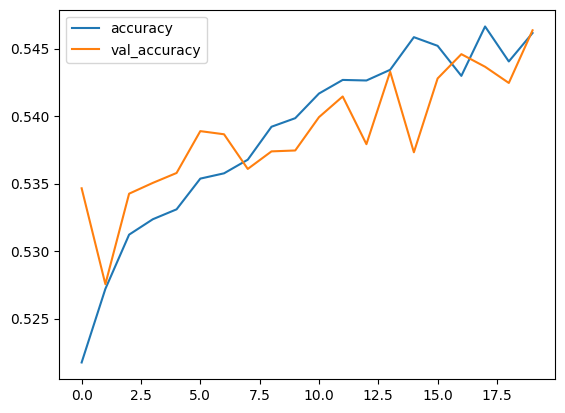

In [ ]:
plt.plot(lstm_model.history.history['accuracy'], label='accuracy')
plt.plot(lstm_model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### GRU 모델링

In [ ]:
# 모델 설계
gru_model = Sequential()
gru_model.add(InputLayer(input_shape=(10,1)))
gru_model.add(GRU(units=64))
gru_model.add(Dense(units=1, activation='sigmoid'))
# 모델학습 및 평가방법 설정
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 학습
gru_model.fit(X_train_vec,y_train, validation_split=0.2, epochs=20, batch_size=128)

# 6분 소요

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.5111 - loss: 0.6939 - val_accuracy: 0.5324 - val_loss: 0.6907
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.5218 - loss: 0.6917 - val_accuracy: 0.5319 - val_loss: 0.6904
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.5322 - loss: 0.6906 - val_accuracy: 0.5307 - val_loss: 0.6901
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.5294 - loss: 0.6905 - val_accuracy: 0.5361 - val_loss: 0.6894
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.5316 - loss: 0.6899 - val_accuracy: 0.5337 - val_loss: 0.6896
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.5357 - loss: 0.6894 - val_accuracy: 0.5345 - val_loss: 0.6894
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.5344 - loss: 0.6892 - val_accuracy: 0.5399 - val_loss: 0.6878
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.5416 - loss: 0.6873 - 

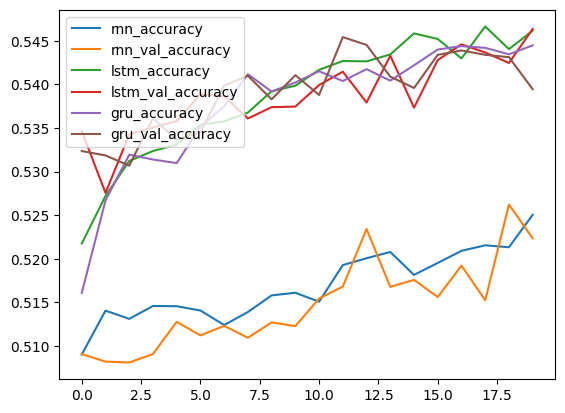

In [ ]:
# 결과 시각화 -> 비교 rnn, lstm, gru 모델
plt.plot(rnn_model.history.history['accuracy'], label='rnn_accuracy')
plt.plot(rnn_model.history.history['val_accuracy'], label='rnn_val_accuracy')

plt.plot(lstm_model.history.history['accuracy'], label='lstm_accuracy')
plt.plot(lstm_model.history.history['val_accuracy'], label='lstm_val_accuracy')

plt.plot(gru_model.history.history['accuracy'], label='gru_accuracy')
plt.plot(gru_model.history.history['val_accuracy'], label='gru_val_accuracy')
plt.legend(loc='upper left')
plt.show()

### 텍스트 데이터 질 향상시키기
- 워드 임배딩(Word Embedding)
   - 자연어처리에서 단어를 수치화된 벡터로 표현하는 방법
   - 단어를 컴퓨터가 처리할 수 있도록 수치로 변환하는 과정에서 단어의 "의미적 유사성" 반영하기 위해 학습하여 벡터화 진행
   - 자연어를 이해하고 분석하는 다양한 작업을 효율적으로 수행

In [ ]:
from tensorflow.keras.layers import Embedding # 임베딩 레이어

In [ ]:
# LSTM 모델에 워드 임배딩을 조합하여 결과 출력
embedding_model = Sequential()
# 임배딩 레이어 추가
embedding_model.add(Embedding(5000, 50)) # 사용하는 단어사전의 수, 한 단어를 인식할 숫자 벡터의 크기
# 단어사전의 수: 우리가 사용할 전처리 단어사전의 수와 맞춰주어야 함 (5000개)
# 벡터의 크기: 한 단어마다 50개의 실수값으로 표현 -> 학습을 통해 각 단어의 의미를 표현한다

# LSTM 레이어는 앞에서 오는 embedding 레이어의 출력을 받아 자동으로 input_shape를 결정
# (시퀀스 길이, 50)
embedding_model.add(LSTM(64))
embedding_model.add(Dense(1, activation='sigmoid'))
embedding_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
embedding_model.fit(X_train_vec, y_train, validation_split=0.2, epochs=20, batch_size=128)

# 11분 소요

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.6846 - loss: 0.5513 - val_accuracy: 0.7603 - val_loss: 0.4640
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7716 - loss: 0.4388 - val_accuracy: 0.7674 - val_loss: 0.4552
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.7776 - loss: 0.4211 - val_accuracy: 0.7688 - val_loss: 0.4557
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.7854 - loss: 0.4102 - val_accuracy: 0.7597 - val_loss: 0.4679
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.7909 - loss: 0.3972 - val_accuracy: 0.7630 - val_loss: 0.4752
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.7980 - loss: 0.3824 - val_accuracy: 0.7577 - val_loss: 0.4850
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.8048 - loss: 0.3696 - val_accuracy: 0.7544 - val_loss: 0.4972
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.8110 - loss: 0.3567 - 

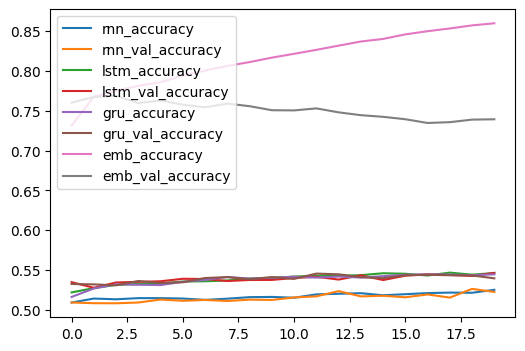

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(rnn_model.history.history['accuracy'], label='rnn_accuracy')
plt.plot(rnn_model.history.history['val_accuracy'], label='rnn_val_accuracy')

plt.plot(lstm_model.history.history['accuracy'], label='lstm_accuracy')
plt.plot(lstm_model.history.history['val_accuracy'], label='lstm_val_accuracy')

plt.plot(gru_model.history.history['accuracy'], label='gru_accuracy')
plt.plot(gru_model.history.history['val_accuracy'], label='gru_val_accuracy')

plt.plot(embedding_model.history.history['accuracy'], label='emb_accuracy')
plt.plot(embedding_model.history.history['val_accuracy'], label='emb_val_accuracy')
plt.legend(loc='upper left')
plt.show()

### 임베딩 레이어를 활용한 전이학습
- 잘 만들어진 임베딩 벡터는 전이학습에 활용할 수 있다.


In [ ]:
embedding_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 10, 50)              │         250,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 838,517 (3.20 MB)

 Trainable params: 279,505 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 559,012 (2.13 MB)

In [ ]:
# 해당 레이어의 이름을 불러 떼어다가 사용할 수 있다 -> 전이학습 역할
em_layer = embedding_model.get_layer('embedding')

In [ ]:
em_layer.get_weights()  # 가중치 결과

[array([[ 0.15181243, -0.01457542, -0.00953763, ...,  0.06216636,
         -0.04341182, -0.02490312],
        [ 0.09590328,  0.00710364,  0.00746894, ...,  0.03779928,
          0.00169145, -0.01818817],
        [ 0.1458458 ,  0.06908187, -0.05266626, ...,  0.05034278,
          0.07633781,  0.0121666 ],
        ...,
        [ 0.13299753,  0.3433782 ,  0.33566353, ..., -0.45802608,
         -0.24206214, -0.24037723],
        [ 0.11124942,  0.17121665,  0.3888805 , ..., -0.27952775,
         -0.26088873, -0.23761903],
        [-0.16234094, -0.15362981,  0.51836467, ...,  0.2512635 ,
         -0.10784645, -0.0238439 ]], dtype=float32)]

In [41]:
em_layer.get_weights()[0].shape

(5000, 50)

### RNN 계열 모델 여러층 쌓아보기 / RNN, GRU, LSTM 등
- RNN 계열의 레이어는 기본적으로 다수입력, 단일출력 구조
- RNN 계열의 레이어를 여러개 쌓기 위해서는 이전 레이어를 다수입력 다수출력 구조로 변경
- return_seqeunces = True/False(기본값)
  - return_seqeunces = False : 다수입력 단일출력 -> 마지막 시점의 출력만 반환 -> 최종 예측값만 필요할때 사용 (예: 단어토큰 여러개를 입력받아 감성분석)
  - return_seqeunces = True : 다수입력 다수출력 -> 모든 시점에 대한 정보를 다음층에 넘길 때 활용 (예: 출력을 다음 레이어에 넘길때, 각 시점에 대한 모든 출력을 원할때 -> 번역)

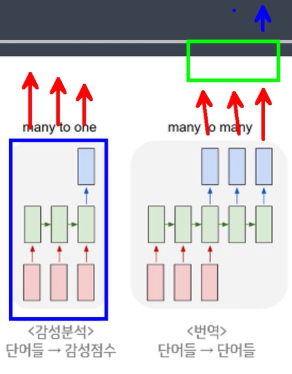

In [42]:
# 모델 설계
embedding_model2 = Sequential()
# 임배딩 레이어 추가
embedding_model2.add(Embedding(5000, 50)) # 사용하는 단어사전의 수, 한 단어를 인식할 숫자 벡터의 크기
embedding_model2.add(LSTM(64, return_sequences=True)) # 다수입력 다수출력
embedding_model2.add(LSTM(64))

embedding_model2.add(Dense(1, activation='sigmoid'))
embedding_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
embedding_model2.fit(X_train_vec, y_train, validation_split=0.2, epochs=20, batch_size=128)

# 14분 소요

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 47ms/step - accuracy: 0.6915 - loss: 0.5453 - val_accuracy: 0.7647 - val_loss: 0.4580
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.7684 - loss: 0.4426 - val_accuracy: 0.7680 - val_loss: 0.4533
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.7769 - loss: 0.4269 - val_accuracy: 0.7646 - val_loss: 0.4545
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.7839 - loss: 0.4111 - val_accuracy: 0.7638 - val_loss: 0.4634
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7875 - loss: 0.3968 - val_accuracy: 0.7657 - val_loss: 0.4647
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.7976 - loss: 0.3827 - val_accuracy: 0.7619 - val_loss: 0.4816
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.8059 - loss: 0.3667 - val_accuracy: 0.7547 - val_loss: 0.5072
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.8115 - loss: 0.3548 - 

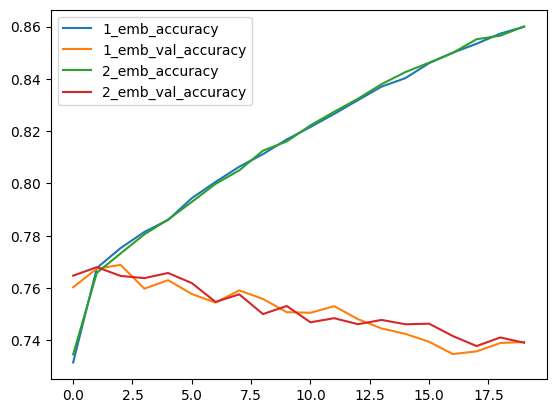

In [44]:
plt.plot(embedding_model.history.history['accuracy'], label='1_emb_accuracy')
plt.plot(embedding_model.history.history['val_accuracy'], label='1_emb_val_accuracy')

plt.plot(embedding_model2.history.history['accuracy'], label='2_emb_accuracy')
plt.plot(embedding_model2.history.history['val_accuracy'], label='2_emb_val_accuracy')
plt.legend(loc='upper left')
plt.show()

| 신경망 종류 | 특징 |
|------------|--------------------------------|
| **ANN (Artificial Neural Network)** | 기본적인 신경망, 1~2개 층 |
| **DNN (Deep Neural Network)** | 3개 이상의 은닉층이 있는 심층 신경망 |
| **CNN (Convolutional Neural Network)** | 이미지 처리에 특화된 신경망 |
| **RNN (Recurrent Neural Network)** | 시계열 데이터, 자연어 처리에 특화된 신경망 |